<a href="https://colab.research.google.com/github/wozzin/AI_deeplearning/blob/main/Deep_faults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
faults = pd.read_csv('/content/drive/MyDrive/Deep/faults_mini.csv')

In [ ]:
faults

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,42,270900,267,80,1,0,0
1,1084,185575,108,40,0,0,1
2,1109,1170194,130,175,0,1,0
3,190,210936,132,150,1,0,0
4,330,429227,264,150,1,0,0
5,74,779144,1506,150,1,0,0
6,51,585861,139,70,0,1,0
7,397,604478,444,70,0,1,0
8,43,366881,4048,40,0,0,1
9,48,377537,3985,40,0,0,1


In [ ]:
var_x = np.random.randint(0,7,size = 99)
var_x_outlier = [100]

var_x = np.hstack([var_x, var_x_outlier])

var_y = np.random.randint(0,40, size = 100)

print("var_x \n", var_x)
print("var_y \n", var_y)

var_x 
 [  5   5   2   0   5   5   0   1   3   6   3   5   2   1   4   3   3   4
   5   3   2   1   4   1   4   5   1   4   1   2   1   0   5   1   3   0
   5   0   3   3   1   1   5   0   4   4   3   2   2   4   0   4   2   4
   4   2   1   4   1   6   6   4   1   5   4   5   4   2   5   0   4   4
   3   2   4   3   2   1   2   1   6   0   5   2   5   0   2   6   1   2
   1   1   6   3   3   3   2   0   0 100]
var_y 
 [13 21  4 36 36 35 37 34 19 19 16 16 14 38  2 27 36 26 37 27 25 30 17 33
 18 25 11 39  9 15 21  8 18 32 38 23  9  0  9  4 27 34 22 20 20 20  1 39
 39  3 31 25 13 23 25  9 36  8 16 31 32  4 36  2 23 21  8 13 20 10 25 28
 38  3 34 27  2 30 20  0 25  2 25 31 29 11 15 31  5 28 39 21 36 10 25 24
 12 34 35 16]


In [ ]:
var_x_norm = (var_x - var_x.min()) / (var_x.max() - var_x.min())
var_y_norm = (var_y - var_y.min()) / (var_y.max() - var_y.min()) 
print("var_x_norm : \n", var_x_norm[:10])
print("var_y_norm : \n", var_y_norm[:10])

var_x_norm : 
 [0.05 0.05 0.02 0.   0.05 0.05 0.   0.01 0.03 0.06]
var_y_norm : 
 [0.33333333 0.53846154 0.1025641  0.92307692 0.92307692 0.8974359
 0.94871795 0.87179487 0.48717949 0.48717949]


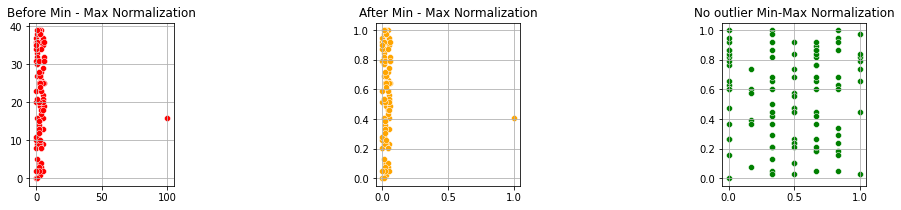

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,3))

plt.subplot(1,5,1)

sns.scatterplot(var_x, var_y, color = 'red')
plt.title("Before Min - Max Normalization")
plt.grid()

plt.subplot(1,5,3)

sns.scatterplot(var_x_norm, var_y_norm, color = 'orange')
plt.title("After Min - Max Normalization")
plt.grid()

var_x = np.random.randint(0,7, size = 100)
var_y = np.random.randint(0,40,size = 100)

var_x_norm = (var_x - var_x.min()) / (var_x.max() - var_x.min())
var_y_norm = (var_y - var_y.min()) / (var_y.max() - var_y.min()) 

plt.subplot(1,5,5)
sns.scatterplot(var_x_norm,var_y_norm, color = 'green')
plt.title("No outlier Min-Max Normalization")
plt.grid()

plt.show()

In [ ]:
faults_norm = (faults - faults.min()) / (faults.max() - faults.min())
display(faults_norm.describe())

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.276289,0.317380,0.252360,0.418519,0.400000,0.300000,0.300000
std,0.393577,0.306181,0.403859,0.398155,0.516398,0.483046,0.483046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006326,0.111028,0.006536,0.055556,0.000000,0.000000,0.000000
50%,0.084349,0.221209,0.039975,0.259259,0.000000,0.000000,0.000000
75%,0.317010,0.420720,0.287437,0.814815,1.000000,0.750000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(faults_norm[:5])
faults_shuffle = faults_norm.sample(frac=1)
print(faults_shuffle[:5])

   X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
0   0.000000   0.086658      0.040355  ...     1.0        0.0       0.0
1   0.976570   0.000000      0.000000  ...     0.0        0.0       1.0
2   1.000000   1.000000      0.005584  ...     0.0        1.0       0.0
3   0.138707   0.025757      0.006091  ...     1.0        0.0       0.0
4   0.269916   0.247458      0.039594  ...     1.0        0.0       0.0

[5 rows x 7 columns]
   X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
0   0.000000   0.086658      0.040355  ...     1.0        0.0       0.0
3   0.138707   0.025757      0.006091  ...     1.0        0.0       0.0
4   0.269916   0.247458      0.039594  ...     1.0        0.0       0.0
9   0.005623   0.194961      0.984010  ...     0.0        0.0       1.0
2   1.000000   1.000000      0.005584  ...     0.0        1.0       0.0

[5 rows x 7 columns]


In [ ]:
faults_np = faults_shuffle.to_numpy()
print(type(faults_np))

<class 'numpy.ndarray'>


In [ ]:
train_ratio = 0.8
input_cnt = 4 # 독립변수
output_cnt = 3 # 종속변수

train_idx = int(len(faults_np)* train_ratio)
print(train_idx)

8


In [ ]:
train_X, train_Y = faults_np[:train_idx, :-output_cnt], faults_np[:train_idx, -output_cnt:]

In [ ]:
test_X, test_Y = faults_np[train_idx :,: -output_cnt], faults_np[train_idx:,-output_cnt:]

In [ ]:
print(train_Y.shape)
print(test_Y.shape)

(8, 3)
(2, 3)


In [ ]:
simple_layer_model = tf.keras.Sequential([
                                          tf.keras.layers.Dense(units=3, 
                                                                activation = 'softmax',
                                                                input_shape = (4,))
                                          ])

In [ ]:
simple_layer_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
simple_layer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                           loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
history_1 = simple_layer_model.fit(train_X, train_Y,
                       epochs = 25,
                       batch_size = 2)

Epoch 1/25
4/4 [==============================] - 0s 3ms/step - loss: 1.1085 - accuracy: 0.0000e+00
Epoch 2/25
4/4 [==============================] - 0s 4ms/step - loss: 1.0832 - accuracy: 0.1250
Epoch 3/25
4/4 [==============================] - 0s 3ms/step - loss: 1.0618 - accuracy: 0.3750
Epoch 4/25
4/4 [==============================] - 0s 4ms/step - loss: 1.0398 - accuracy: 0.7500
Epoch 5/25
4/4 [==============================] - 0s 3ms/step - loss: 1.0185 - accuracy: 0.7500
Epoch 6/25
4/4 [==============================] - 0s 3ms/step - loss: 1.0031 - accuracy: 0.7500
Epoch 7/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9868 - accuracy: 0.7500
Epoch 8/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9664 - accuracy: 0.7500
Epoch 9/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9538 - accuracy: 0.7500
Epoch 10/25
4/4 [==============================] - 0s 2ms/step - loss: 0.9369 - accuracy: 0.7500
Epoch 11/25
4/4 [==================

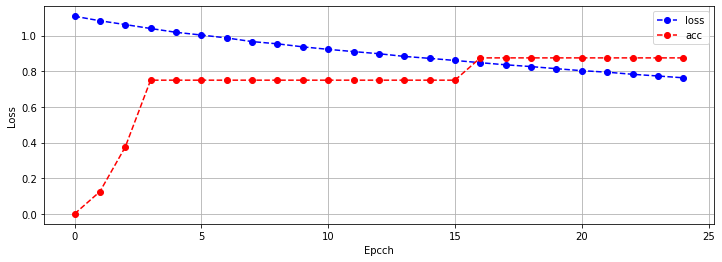

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(history_1.history['loss'], 'b--o', label = 'loss')
plt.plot(history_1.history['accuracy'], 'r--o', label = 'acc')
plt.xlabel('Epcch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
simple_layer_model.evaluate(test_X,test_Y)

1/1 [==============================] - 0s 115ms/step - loss: 0.8957 - accuracy: 0.5000


[0.8956736326217651, 0.5]

In [ ]:
test_Y.shape

(2, 3)

In [ ]:
pred_Y = simple_layer_model.predict(test_X)
print("pred_Y : ", pred_Y)

pred_Y :  [[0.13036405 0.36840558 0.5012304 ]
 [0.33265212 0.44827744 0.21907037]]


In [ ]:
pred_Y = np.argmax(pred_Y, axis = 1)
print("pred_Y :", pred_Y)

pred_Y : [2 1]


In [ ]:
test_Y = np.argmax(test_Y, axis = 1)
print("test_Y :", test_Y)

test_Y : [2 0]


In [ ]:
np.equal(pred_Y, test_Y)

array([ True, False])

In [ ]:
acc = np.mean(np.equal(pred_Y, test_Y))
print("ACC : {} %".format(acc * 100))

ACC : 50.0 %


In [ ]:

df_dataset = pd.read_csv('/content/drive/MyDrive/Deep/faults.csv')
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [ ]:
faults_norm = (df_dataset - df_dataset.min()) / (df_dataset.max() - df_dataset.min()) 

In [ ]:
faults_norm.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,0.334977,0.359254,0.126645,0.126648,0.012393,0.010515,0.004516,0.017778,0.416496,0.431452,0.409454,0.400309,0.599691,0.148991,0.333315,0.438821,0.567175,0.036438,0.604838,0.803985,0.575734,0.448807,0.373115,0.329507,0.541831,0.528699,0.529422,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,0.305390,0.291180,0.136706,0.136707,0.033858,0.028832,0.023496,0.044197,0.158297,0.086532,0.254987,0.490087,0.490087,0.211869,0.301157,0.145420,0.273327,0.067430,0.246831,0.246189,0.482352,0.161577,0.173673,0.106686,0.252619,0.090656,0.385303,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029912,0.110006,0.035786,0.035788,0.000537,0.001244,0.000661,0.000800,0.310345,0.402778,0.231041,0.000000,0.000000,0.000000,0.060691,0.334569,0.355954,0.005833,0.403206,0.576293,0.000000,0.332459,0.252064,0.253411,0.331719,0.489884,0.146652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.255132,0.270919,0.092244,0.092244,0.001127,0.002297,0.001322,0.001635,0.443350,0.416667,0.241623,0.000000,1.000000,0.115385,0.228396,0.436593,0.551881,0.009835,0.631088,0.944725,1.000000,0.397239,0.315567,0.310470,0.547839,0.527666,0.439614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.617595,0.624927,0.167658,0.167658,0.005372,0.007849,0.004518,0.007140,0.522167,0.476852,0.746032,1.000000,1.000000,0.153846,0.576568,0.531412,0.816678,0.025160,0.797078,1.000000,1.000000,0.535339,0.439039,0.406791,0.757855,0.568129,0.999773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
faults_shuffle = faults_norm.sample(frac = 1) 
print(faults_shuffle[:5])
print(type(faults_norm))

      X_Minimum  X_Maximum  Y_Minimum  ...  Dirtiness  Bumps  Other_Faults
1805   0.607625   0.614394   0.073452  ...        0.0    0.0           1.0
931    0.616422   0.621416   0.095825  ...        0.0    1.0           0.0
1543   0.672141   0.713283   0.307470  ...        0.0    0.0           1.0
1296   0.004106   0.008777   0.028417  ...        0.0    0.0           1.0
1856   0.000000   0.013458   0.104241  ...        0.0    0.0           1.0

[5 rows x 34 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
faults_np = faults_shuffle.to_numpy()
print(type(faults_np))

<class 'numpy.ndarray'>


In [ ]:
train_ratio = 0.9
input_cnt   = 27
output_cnt  = 7

In [ ]:
train_idx = int(len(faults_np) * train_ratio)
print("train_idx : ", train_idx)

train_idx :  1746


In [ ]:
train_X, train_Y = faults_np[:train_idx, :-output_cnt], faults_np[:train_idx, -output_cnt : ]
test_X, test_Y = faults_np[train_idx:, :-output_cnt], faults_np[train_idx:, -output_cnt : ]

In [ ]:
print(train_X.shape)
print(train_Y.shape)

print(test_X.shape)
print(test_Y.shape)

(1746, 27)
(1746, 7)
(195, 27)
(195, 7)


In [ ]:
multi_layer_model = tf.keras.Sequential([
                                         tf.keras.layers.Dense(units= 48,
                                                               activation = 'elu',
                                                               input_shape = (27,)),
                                         tf.keras.layers.Dense(units=24,
                                                               activation = 'elu'),
                                         tf.keras.layers.Dense(units=12,
                                                               activation = 'elu'),
                                         tf.keras.layers.Dense(units=7,
                                                               activation = 'softmax')
])

In [ ]:
multi_layer_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 48)                1344      
_________________________________________________________________
dense_3 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 91        
Total params: 2,911
Trainable params: 2,911
Non-trainable params: 0
_________________________________________________________________


In [ ]:
multi_layer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          loss = 'categorical_crossentropy')

In [ ]:
history_2 = multi_layer_model.fit(train_X, train_Y,
                                  epochs = 200, batch_size = 10)

Epoch 1/200
175/175 [==============================] - 1s 1ms/step - loss: 1.1680
Epoch 2/200
175/175 [==============================] - 0s 1ms/step - loss: 0.9375
Epoch 3/200
175/175 [==============================] - 0s 2ms/step - loss: 0.9080
Epoch 4/200
175/175 [==============================] - 0s 1ms/step - loss: 0.8404
Epoch 5/200
175/175 [==============================] - 0s 2ms/step - loss: 0.8186
Epoch 6/200
175/175 [==============================] - 0s 2ms/step - loss: 0.7968
Epoch 7/200
175/175 [==============================] - 0s 2ms/step - loss: 0.7768
Epoch 8/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7749
Epoch 9/200
175/175 [==============================] - 0s 2ms/step - loss: 0.7222
Epoch 10/200
175/175 [==============================] - 0s 2ms/step - loss: 0.7332
Epoch 11/200
175/175 [==============================] - 0s 1ms/step - loss: 0.6966
Epoch 12/200
175/175 [==============================] - 0s 2ms/step - loss: 0.7010
Epoch 13/200


In [ ]:
multi_layer_model.evaluate(test_X, test_Y)

7/7 [==============================] - 0s 2ms/step - loss: 2.0679


2.067871332168579

In [ ]:
test_X.shape

(195, 27)

In [ ]:
import matplotlib.pyplot as plt


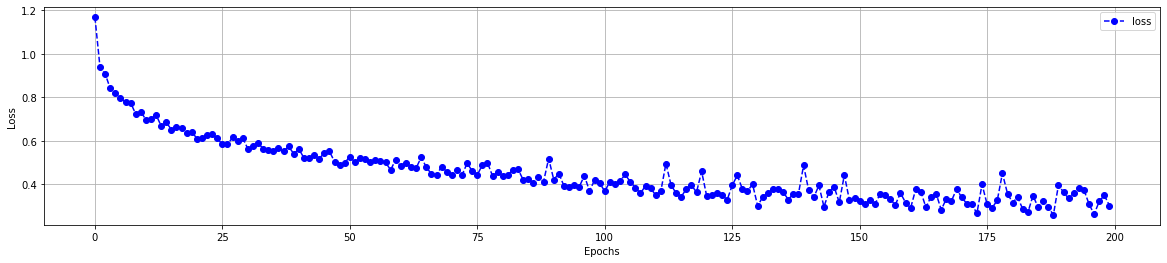

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(history_2.history['loss'],'b--o',label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

In [ ]:
pred_Y = multi_layer_model.predict(test_X)
print(pred_Y)


[[1.6689096e-11 1.8188789e-03 9.1320580e-01 ... 1.6084434e-19
  1.2738950e-06 8.4962763e-02]
 [1.2056885e-01 8.5005354e-07 3.1171796e-05 ... 8.9480949e-05
  1.8115161e-01 6.9815761e-01]
 [8.1911194e-01 2.8660722e-07 1.6455533e-03 ... 1.2887618e-06
  3.8610127e-05 1.7920241e-01]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [5.7463875e-08 1.0335446e-10 9.9844700e-01 ... 3.7207093e-21
  5.4497405e-12 1.5530586e-03]
 [4.3160339e-06 9.7958392e-01 1.5875190e-07 ... 4.2571102e-10
  2.0871407e-03 1.8322093e-02]]


In [ ]:
pred_Y = np.argmax(pred_Y,axis=1)
print(pred_Y)

[2 6 0 6 2 2 6 6 3 1 5 5 0 2 6 2 2 6 6 1 5 6 6 2 6 2 6 6 6 5 1 1 6 1 6 6 2
 6 2 6 5 6 1 4 5 6 2 6 6 2 2 1 2 2 5 2 1 3 6 6 5 6 2 5 2 2 2 6 6 6 0 6 5 4
 6 6 1 5 5 6 5 2 2 5 6 3 5 6 6 5 5 2 2 6 5 1 6 1 5 5 5 6 2 6 1 3 1 1 0 5 6
 2 2 5 5 5 6 1 5 6 5 0 0 4 1 5 6 2 5 1 0 5 0 6 3 6 2 6 2 5 2 6 6 5 6 0 0 1
 2 2 3 5 6 6 1 2 2 2 5 4 6 5 2 6 5 2 6 6 5 6 5 6 3 5 6 6 1 5 0 2 6 6 2 6 6
 3 1 6 4 6 5 6 6 2 1]


In [ ]:
test_Y = np.argmax(test_Y,axis=1)
print(test_Y)

[2 6 0 6 2 2 6 6 3 1 5 5 6 2 5 2 2 6 6 1 5 5 5 2 6 2 5 6 5 5 1 1 6 1 6 0 2
 6 2 0 5 5 1 4 5 6 2 6 6 2 2 6 2 2 5 2 1 3 6 6 5 1 2 0 2 2 2 6 6 6 0 0 5 0
 5 6 1 5 5 6 5 2 2 6 6 3 5 5 6 5 6 2 2 6 5 1 6 1 5 5 5 1 2 6 1 3 1 1 0 5 0
 2 2 5 5 5 6 1 5 6 6 0 0 6 1 6 0 2 5 1 1 6 6 6 3 6 2 6 2 5 2 6 6 5 6 0 0 1
 2 2 3 6 6 6 1 2 2 2 6 5 6 5 6 5 5 2 6 6 5 6 5 6 3 5 6 5 1 6 0 2 1 6 2 5 6
 3 1 6 4 6 5 6 2 2 6]


In [ ]:
np.equal(pred_Y, test_Y)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True,

In [1]:
 acc = np.mean(np.equal(pred_Y, test_Y))
 print("정확도 ACC : {} % ".format(np.round(acc*100,3)))

NameError: ignored